<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day1/output_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 出力層

### 誤差関数

$$
E_n(w)=\frac{1}{2}\sum_{j=1}^l(y_j-d_j)^2 = \frac{1}{2}||(y-d)||^2
$$

- 分類問題の場合、誤差関数にクロスエントロピー誤差を用いる
  ```
  def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size
  
  loss =cross_entropy_error(d,y)
  ```

- 説明上では便宜上、平均二乗誤差を用いる
  ```
  def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2
  
  loss = mean_squared_error(d, y)
  ```


## 出力層の活性化関数

出力層と中間層の違いにより、利用される活性化関数が異なる

- 値の強弱
  - 中間層︓しきい値の前後で信号の強弱を調整
  - 出力層︓信号の大きさ（比率）はそのままに変換
- 確率出力
  - 分類問題の場合、出力層の出力は0 ~ 1 の範囲に限定し、総和を１とする必要がある

種類

||回帰|二値分類|多クラス分類|
|:---|:---:|:---:|:---:|
|活性化関数|恒等写像|シグモイド関数|ソフトマックス関数|
|誤差関数|二乗誤差|交差エントロピー|交差エントロピー|

- 活性化関数
  - 恒等写像
  $$
    f(u)=u
  $$
  - シグモイド関数
  $$
  f(u)=\frac{1}{1+e^{-u}}
  $$
  - ソフトマックス関数
  $$
  f(i,u)=\frac{e^{u_i}}{\sum_{k=1}^{K}e^{u_k}}
  $$
- 誤差関数
  - 二乗誤差
  $$
  E_n(w)=\frac{1}{2}\sum_{i=1}^{l}(y_n-d_n)^2
  $$
    ```
    def mean_squared_error(d, y):
      return np.mean(np.square(d -y)) / 2
    ```
  - 交差エントロピー
  $$
  E_n(w)=-\sum_{i=1}^{l}d_i\log y_i
  $$
    ```
    def cross_entropy_error(d, y):
      if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
      # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
      if d.size == y.size:
        d = d.argmax(axis=1)
             
      batch_size = y.shape[0]
      return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size
    ```
- 学習サイクルあたりの誤差
$$
E(w)=\sum_{n=1}^{N}E_n
$$

In [ ]:
import numpy as np
import matplotlib.pylab as plt

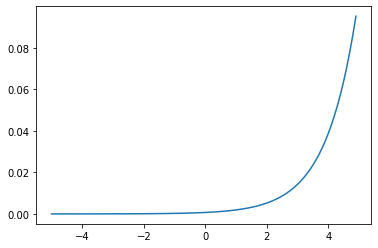

In [ ]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x -np.max(x, axis=0)
    y = np.exp(x) /np.sum(np.exp(x), axis=0)
    return y.T
  x = x -np.max(x) #オーバーフロー対策
  return np.exp(x) / np.sum(np.exp(x))

x = np.arange(-5, 5, 0.1)
y = softmax(x)
plt.plot(x, y)
plt.show()

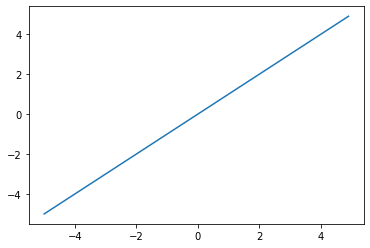

In [ ]:
def identity(a):
  return a

x = np.arange(-5, 5, 0.1)
y = identity(x)
plt.plot(x, y)
plt.show()

## 確認テスト

### P.38

- Q:
  1. なぜ、引き算でなく二乗するか述べよ
  2. 下式の1/2はどういう意味を持つか述べよ
- A:
  1. 各ラベルの誤差を足すと0になってしまうため、それぞれを正の値にする
  2. 微分時に相殺させ、式の簡略化が目的

### P.45

- Q: 1~3の数式に該当するソースコードを示し、一行づつ処理の説明をせよ
  1. $f(i,u)$
  2. $e^{u_i}$
  3. $\sum_{k=1}^{K}e^{u_k}$
- A:
  1. `def softmax(x):`
    - x=(_,u)のような関数で定義
  2. `np.exp(x)`
    - exp関数を使用
  3. `np.sum(np.exp(x))`
    - exp関数の合計値を算出

### P.47

- Q:
  1. $E_n(w)$
  2. $-\sum_{i=1}^{l}d_i\log y_i$
- A:
  1. `def cross_entropy_error(d, y):`
    - 関数定義()
  2. `return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size`
    - one-hotの値でも可
    - batch_size:ミニバッチのサイズを定義
    - e-7: 対数関数で0のときに-∞になるのを防ぐ